<a href="https://colab.research.google.com/github/yashu094/FML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [237]:
a=pd.read_csv('cpdata.csv')

In [238]:
a.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [239]:
a.corr()

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


In [240]:
x=a.drop('label',axis=1)

In [241]:
x.head()

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340


In [242]:
y=a['label'].values

In [243]:
y.shape

(3100,)

In [244]:
y=y.reshape(-1,1)

In [245]:
le=LabelEncoder()

In [246]:

y=le.fit_transform(y)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [248]:
m=LogisticRegression(C=0.5,max_iter=4000)
m.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, max_iter=4000)

In [249]:
m.predict_proba(x)

array([[2.01245685e-25, 1.06886566e-15, 2.91013487e-22, ...,
        7.92061688e-01, 1.10258265e-30, 3.03170868e-06],
       [9.17556770e-26, 1.90666094e-17, 3.56707731e-20, ...,
        9.00039868e-01, 4.35922434e-37, 1.20678531e-05],
       [3.06341070e-28, 7.78010853e-21, 1.37380388e-19, ...,
        9.65943613e-01, 3.01422508e-46, 7.08534261e-06],
       ...,
       [1.54258816e-22, 3.19748554e-06, 2.78064716e-31, ...,
        1.61516685e-15, 5.50145572e-01, 1.84355458e-13],
       [1.69459350e-20, 9.04391255e-06, 1.16809371e-30, ...,
        5.38134562e-15, 4.56712733e-01, 1.25700147e-12],
       [5.75354847e-21, 9.72815684e-06, 1.47079394e-31, ...,
        2.88215481e-12, 4.46682545e-01, 9.78439963e-12]])

In [250]:
scale=StandardScaler()
scale.fit(x)
x=scale.transform(x)


In [251]:
y_pred=m.predict(x_test)
print(y_pred)

[14  7 15 21  4 13 28  9  9 18  7  9 10 14  9  7 14  2  7 22  7  8 26 28
  4 17 29 18 12 22 24 24 21 16 11  8 29  4  8  3  8 18  4  4 23 14  0 18
 26 16 16  9  4 16 30 12 29  1 24  6 20 24 25 12  1 19  2 21 13 21 11 16
  1  4 16  5  3 25  3 25  7 23  3  3  6  4  1 14 27 18 22 18 25 19 13  5
  5 30 22  0 21 24  4 30  9 18  7 14 16  4 10 15 25 28 28 26 12 25 10  9
  3  9 16 25  2 30 18  7 22 21  7 26 14 22 29  4 29  5  7  3 18 30 27 26
 21  9 17 23 17  4  3 18 27 16 24 25 24 23  5  2 23 10  9 15 23 10 22 27
 24 12 17 27 12  5  3  8  9 15 14  1 19 29  8 16 12 11 20 24 25 25 24 29
 23 12 15  6 10 21  7 29 18 20  7 20 29  2 18 11 19 28  4 20 25 17 12  7
 10 11 29 10  9  8 20 19  1  6  3 22 25 13 22  5 28  7  9 13 28  0 26 26
 18  4 13  8  2 15 25  5  9 28 23 14  4  2  6 18 12  4 27  7 13 29  8  4
 19  8 23  3  8 12 15  2 26 28 27 28  4  4 28 17 17  3 19 16  6 14  5 12
 17 10  1 16  0 16 30 29  2 15 26  0  4  5 14 30 29 24  8 17 24  0  0  5
 30 23 10  0 11 18 16 30 10 19 14 30 23  8 19 10 19

In [252]:
m.score(x_test,y_test)

0.7655913978494624

In [253]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  3  0  0  0  0]
 [ 0  0  0  0 23  0  1  2  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  7]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  0
   0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0 19  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0  1  0
   0  0  0  0  0  0  0]
 [ 0  0  0  2  3  0  0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 26  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0 

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.84      0.89      0.86        35
           2       1.00      1.00      1.00        28
           3       0.91      0.91      0.91        32
           4       0.62      0.66      0.64        35
           5       0.79      0.82      0.81        28
           6       0.70      0.76      0.73        25
           7       0.58      0.70      0.63        27
           8       0.97      1.00      0.99        35
           9       0.87      0.90      0.88        29
          10       0.75      0.68      0.71        31
          11       0.78      0.78      0.78        27
          12       1.00      1.00      1.00        34
          13       0.68      0.50      0.58        26
          14       0.90      0.81      0.85        32
          15       0.80      0.67      0.73        36
          16       0.83      0.97      0.89        35
          17       0.68    

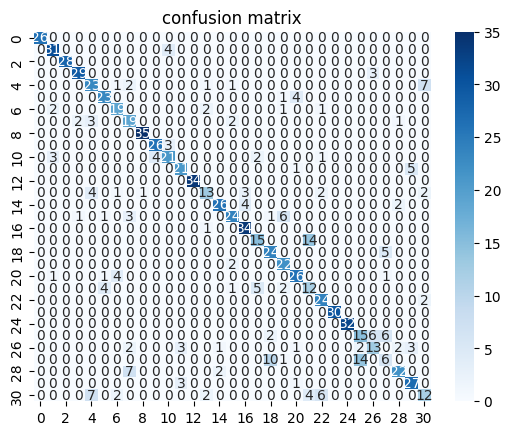

In [257]:
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,fmt='d',cmap="Blues",ax=ax)
ax.set_title("confusion matrix")
plt.show()